## Answering Business Questions using SQL

For this project, I use the chinook database which has the below schema:

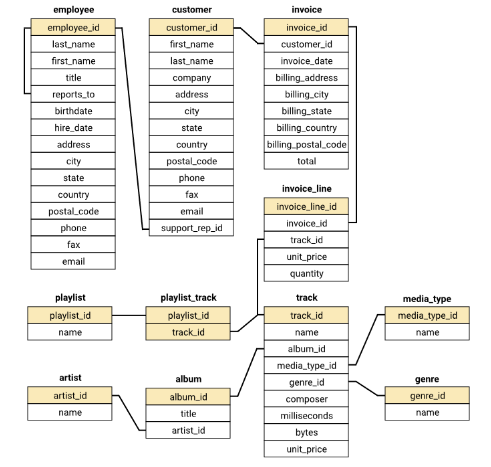

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

## Overview of our data

Obtaining a list of all tables and views of our database

In [2]:
%%sql
SELECT name, type
FROM sqlite_master
WHERE type IN ("table", "view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


In [8]:
%%sql
SELECT * FROM employee e
LEFT JOIN customer c ON e.employee_id = c.support_rep_id
LEFT JOIN invoice i ON c.customer_id = i.customer_id
LIMIT 5;

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email,customer_id,first_name_1,last_name_1,company,address_1,city_1,state_1,country_1,postal_code_1,phone_1,fax_1,email_1,support_rep_id,invoice_id,customer_id_1,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,16,1,2017-01-26 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,8.91
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,77,1,2017-05-28 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.9399999999999995
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,149,1,2017-11-30 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,8.91


In [15]:
%%sql
SELECT
(SELECT COUNT(*)  FROM employee) number_of_employees,
(SELECT COUNT(*)  FROM customer) number_of_customers,
(SELECT COUNT(*)  FROM album) number_of_albums;

 * sqlite:///chinook.db
Done.


number_of_employees,number_of_customers,number_of_albums
8,59,347


## Obtaining information from the data

### Selecting albums to purchase

The Chinook record store has just signed a deal with a new record label, and you've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

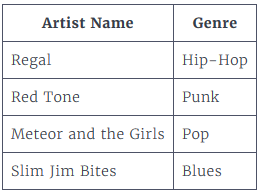

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

In [33]:
%%sql
WITH r AS
(SELECT SUM(il.quantity) as total FROM invoice_line il
INNER JOIN invoice i ON i.invoice_id = il.invoice_id
INNER JOIN customer c ON c.customer_id = i.customer_id
WHERE c.country = 'USA')

SELECT g.name genre, SUM(il.quantity) number_of_tracks, ROUND(CAST(SUM(il.quantity) AS FLOAT)/
(SELECT CAST(total AS FLOAT) FROM r)*100,2) percentage
FROM invoice_line il    
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN genre g ON g.genre_id = t.genre_id
INNER JOIN invoice i ON i.invoice_id = il.invoice_id
INNER JOIN customer c ON c.customer_id = i.customer_id
WHERE c.country = 'USA'
GROUP BY genre
ORDER BY number_of_tracks DESC;


 * sqlite:///chinook.db
Done.


genre,number_of_tracks,percentage
Rock,561,53.38
Alternative & Punk,130,12.37
Metal,124,11.8
R&B/Soul,53,5.04
Blues,36,3.43
Alternative,35,3.33
Pop,22,2.09
Latin,22,2.09
Hip Hop/Rap,20,1.9
Jazz,14,1.33


##### Solution:
I would recommend to add the albums Red Tone, Meteor and the Girls and Slim Jim Bites as these are the
genres that best sell in USA

### Analyzing Employee Sales Performance
Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. You have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

In [36]:
%%sql
SELECT e.first_name||' '||e.last_name employee_name, 
COUNT(c.customer_id) number_of_customers, CAST(SUM(i.total) AS INTEGER)total_sales
FROM employee e
LEFT JOIN customer c ON c.support_rep_id = e.employee_id 
LEFT JOIN invoice i ON i.customer_id = c.customer_id
WHERE e.title = 'Sales Support Agent'
GROUP BY employee_name
ORDER BY total_sales DESC;

 * sqlite:///chinook.db
Done.


employee_name,number_of_customers,total_sales
Jane Peacock,212,1731
Margaret Park,214,1584
Steve Johnson,188,1393


##### Conclusion
The agents do pretty similar on sales among them being Steve the one that less customer has attended and less sales have done. On the other side, the agent who assisted more customers is not the one with higher sales.

### Sales by Countries

Write a query that collates data on purchases from different countries.

In [52]:
%%sql
CREATE VIEW groups_2 AS
SELECT COUNT(c.customer_id) number_of_customers, c.country country, ROUND(SUM(i.total),2) total_order,
 ROUND(AVG(i.total),2) average_order_value
 FROM customer c 
INNER JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY country
ORDER BY number_of_customers DESC;

SELECT * FROM groups_2;

 * sqlite:///chinook.db
Done.
Done.


number_of_customers,country,total_order,average_order_value
131,USA,1040.49,7.94
76,Canada,535.59,7.05
61,Brazil,427.68,7.01
50,France,389.07,7.78
41,Germany,334.62,8.16
30,Czech Republic,273.24,9.11
29,Portugal,185.13,6.38
28,United Kingdom,245.52,8.77
21,India,183.15,8.72
13,Ireland,114.84,8.83


In [64]:
%%sql
SELECT country, number_of_customers, total_order AS total_value_of_sales,
ROUND(total_order/number_of_customers,2) AS average_value_of_sales_per_customer
FROM
(SELECT gr.*,
CASE
WHEN gr.number_of_customers = 1 THEN 1
ELSE 0
END AS others
FROM groups_2 gr)
ORDER BY others ASC;

 * sqlite:///chinook.db
Done.


country,number_of_customers,total_value_of_sales,average_value_of_sales_per_customer
USA,131,1040.49,7.94
Canada,76,535.59,7.05
Brazil,61,427.68,7.01
France,50,389.07,7.78
Germany,41,334.62,8.16
Czech Republic,30,273.24,9.11
Portugal,29,185.13,6.38
United Kingdom,28,245.52,8.77
India,21,183.15,8.72
Ireland,13,114.84,8.83


In [48]:
%%sql
SELECT COUNT(c.customer_id) number_of_customers, c.country country, ROUND(SUM(i.total),2) total_order, 
ROUND(AVG(i.total),2) average_order
 FROM customer c 
INNER JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY country
ORDER BY number_of_customers ASC

 * sqlite:///chinook.db
Done.


number_of_customers,country,total_order,average_order
5,Argentina,39.6,7.92
7,Belgium,60.39,8.63
9,Austria,69.3,7.7
9,Italy,50.49,5.61
9,Norway,72.27,8.03
10,Australia,81.18,8.12
10,Denmark,37.62,3.76
10,Hungary,78.21,7.82
10,Netherlands,65.34,6.53
10,Poland,76.23,7.62


## Albums vs. Individual Tracks

We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

### Edges to take into account
In this analysis, we have the following edges to take into account:

* Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
* Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

In the first case, since our analysis is concerned with maximizing revenue we can safely ignore albums consisting of only a few tracks. The company has previously done analysis to confirm that the second case does not happen often, so we can ignore this case also.

So, I will create a tracks_per_album view that considerate the albums with only a few tracks. Albums with less than 5 tracks will not be taken into consideration in this analysis.

In [20]:
# %%sql
# DROP VIEW tracks_per_album;

 * sqlite:///chinook.db
Done.


[]

#### Creating a view with  the tracks per album taking into account only the albums with more than 5 tracks

In [8]:
%%sql
DROP VIEW tracks_per_album

 * sqlite:///chinook.db
Done.


[]

In [9]:
%%sql
CREATE VIEW tracks_per_album AS

WITH valued_albums AS
    (
        SELECT album_id album_identity
            FROM track
        GROUP BY album_identity
            HAVING COUNT(track_id) > 5
        ORDER BY album_identity
    )

SELECT a.album_id album_number, 
       a.title album_title,
       t.track_id track_id, 
       t.name track_name
FROM album a
    INNER JOIN track t ON t.album_id = a.album_id
        WHERE album_number IN (SELECT album_identity FROM valued_albums)
ORDER BY album_number, track_id;

SELECT * FROM tracks_per_album
LIMIT 30;

 * sqlite:///chinook.db
Done.
Done.


album_number,album_title,track_id,track_name
1,For Those About To Rock We Salute You,1,For Those About To Rock (We Salute You)
1,For Those About To Rock We Salute You,6,Put The Finger On You
1,For Those About To Rock We Salute You,7,Let's Get It Up
1,For Those About To Rock We Salute You,8,Inject The Venom
1,For Those About To Rock We Salute You,9,Snowballed
1,For Those About To Rock We Salute You,10,Evil Walks
1,For Those About To Rock We Salute You,11,C.O.D.
1,For Those About To Rock We Salute You,12,Breaking The Rules
1,For Those About To Rock We Salute You,13,Night Of The Long Knives
1,For Those About To Rock We Salute You,14,Spellbound


#### Obtaining the data of the tracks per invoice to obtain more information from our data

In [7]:
%%sql
SELECT il.invoice_id invoice_number, il.track_id track_number, t.album_id album_number
        FROM invoice_line il
            INNER JOIN track t ON t.track_id = il.track_id
        LIMIT 20;

 * sqlite:///chinook.db
Done.


invoice_number,track_number,album_number
1,1158,91
1,1159,91
1,1160,91
1,1161,91
1,1162,91
1,1163,91
1,1164,91
1,1165,91
1,1166,91
1,1167,91


### FIRST RESULT
By using `WITH clauses` and `NESTES queries` I classify the invoices as **Album Purchase** or **Not album purchase**

In [12]:
%%sql
DROP VIEW type_of_invoice;

 * sqlite:///chinook.db
Done.


[]

In [13]:
%%sql
CREATE VIEW type_of_invoice AS

WITH   number_of_track_per_album AS
    (
    SELECT COUNT(a.track_id) track_album, invoice_id FROM tracks_per_album a
    INNER JOIN invoice_single_albums b ON b.album_id = a.album_number
    GROUP BY invoice_id
    ORDER BY invoice_id
    ),
    number_of_track_per_invoice AS 
    (
    SELECT COUNT(c.track_id) track_invoice, c.invoice_id ivd FROM invoice_line c
    INNER JOIN invoice_single_albums b ON 
    b.invoice_id = c.invoice_id
    GROUP BY ivd
    ORDER BY ivd
    )

SELECT  invoice_id,
    CASE 
        WHEN (album - invoice) = 0 THEN "Album Purchase"
        ELSE "No album purchase"
    END 
        AS Type_of_purchase
        
    FROM
        (SELECT h.track_album album, i.track_invoice invoice, h.invoice_id FROM number_of_track_per_album h
        INNER JOIN number_of_track_per_invoice i
            WHERE h.invoice_id = i.ivd);
        
SELECT * FROM type_of_invoice;

 * sqlite:///chinook.db
Done.
Done.


invoice_id,Type_of_purchase
1,Album Purchase
14,No album purchase
23,Album Purchase
24,Album Purchase
32,Album Purchase
34,No album purchase
64,Album Purchase
69,Album Purchase
76,Album Purchase
77,No album purchase


#### Obtaining the percentage of the data

In [45]:
%%sql
WITH 
    alias_1 AS

(SELECT COUNT(invoice_id) c
    FROM type_of_invoice
        WHERE Type_of_purchase = 'No album purchase'
),
    alias_2 AS
(SELECT COUNT(invoice_id) d
    FROM type_of_invoice
        WHERE Type_of_purchase = 'Album Purchase'
)

SELECT c AS Album_no_purchased, 
    (SELECT d FROM alias_2) Album_purchase,
    ROUND(CAST(c AS FLOAT) /CAST((c +(SELECT d FROM alias_2))AS FLOAT),2)*100 percentage_no_album_purchased,
    ROUND(CAST((SELECT d FROM alias_2)AS FLOAT)/CAST(( c +(SELECT d FROM alias_2))AS FLOAT),2)*100 percentage_album_purchased
FROM alias_1
    
        

 * sqlite:///chinook.db
Done.


Album_no_purchased,Album_purchase,percentage_no_album_purchased,percentage_album_purchased
18,35,34.0,66.0


### Conclusion

I would recommend the company to buy full albums from the records companies as 66% of the sales are albums based

## Other Business Questions:

### 1. Which artist is used in the most playlists?

In [63]:
%%sql
SELECT COUNT(a.name) artist_in_playlist,a.name name_of_artist, p.name playlist_n
    FROM artist a
        INNER JOIN album ON album.artist_id = a.artist_id
        INNER JOIN track ON track.album_id = album.album_id
        INNER JOIN playlist_track ON playlist_track.track_id = track.track_id
        INNER JOIN playlist p ON p.playlist_id = playlist_track.playlist_id
    GROUP BY name_of_artist
    ORDER BY artist_in_playlist DESC
LIMIT 10;

 * sqlite:///chinook.db
Done.


artist_in_playlist,name_of_artist,playlist_n
516,Iron Maiden,Music
333,U2,Music
296,Metallica,Music
252,Led Zeppelin,Music
226,Deep Purple,Music
184,Lost,TV Shows
177,Pearl Jam,Music
145,Faith No More,Music
145,Eric Clapton,Music
143,Lenny Kravitz,Music


### Answer:
Iron Maiden

### 2. How many tracks have been purchased vs not purchased?

In [68]:
%%sql
SELECT 
    COUNT(DISTINCT(il.track_id)) AS purchased_track,
    COUNT(DISTINCT(t.track_id)) - COUNT(DISTINCT(il.track_id)) AS not_purchased_track FROM track t
LEFT JOIN invoice_line il ON il.track_id = t.track_id;

 * sqlite:///chinook.db
Done.


purchased_track,not_purchased_track
1806,1697


### 3. Do protected vs non-protected media types have an effect on popularity?

In [69]:
%%sql
SELECT DISTINCT(name) FROM media_type;

 * sqlite:///chinook.db
Done.


name
MPEG audio file
Protected AAC audio file
Protected MPEG-4 video file
Purchased AAC audio file
AAC audio file


In [83]:
%%sql
SELECT  COUNT(il.track_id) number_of_tracks, m.name media_name
    FROM  invoice_line il
        LEFT JOIN track t ON t.track_id = il.track_id
        LEFT JOIN media_type m ON m.media_type_id = t.media_type_id
    GROUP BY media_name  
    ORDER BY number_of_tracks;

 * sqlite:///chinook.db
Done.


number_of_tracks,media_name
3,Protected MPEG-4 video file
21,AAC audio file
35,Purchased AAC audio file
439,Protected AAC audio file
4259,MPEG audio file


### Answer
No, it does not